In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
pip install scikit-learn

  Using cached scikit_learn-1.3.0-cp39-cp39-macosx_10_9_x86_64.whl (10.2 MB)
  Using cached scipy-1.11.1-cp39-cp39-macosx_10_9_x86_64.whl (37.2 MB)
  Using cached joblib-1.3.1-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 28.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 15.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
fitbit_mean_df = pd.read_csv("fitbit_mean_miles_df.csv")
fitbit_flushed_df = pd.read_csv("fitbit_flushed_miles_df.csv")
weight_stats_df = pd.read_csv("weight_stats_clean_predictor_df.csv")

# Creating 1st linear regression daily steps to daily calories burned

### Set dependent and independent variables:

In [4]:
fitbit_flushed_df

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,Tue,13162,5.28,25,13,328,728,1985
1,1503960366,4/13/2016,Wed,10735,4.33,21,19,217,776,1797
2,1503960366,4/14/2016,Thu,10460,4.19,30,11,181,1218,1776
3,1503960366,4/15/2016,Fri,9762,3.90,29,34,209,726,1745
4,1503960366,4/16/2016,Sat,12669,5.07,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...
837,8877689391,5/8/2016,Sun,10686,5.04,17,4,245,1174,2847
838,8877689391,5/9/2016,Mon,20226,11.34,73,19,217,1131,3710
839,8877689391,5/10/2016,Tue,10733,5.06,18,11,224,1187,2832
840,8877689391,5/11/2016,Wed,21420,12.15,88,12,213,1127,3832


In [47]:
y = fitbit_mean_df['Calories']
x1 = fitbit_mean_df['TotalSteps']

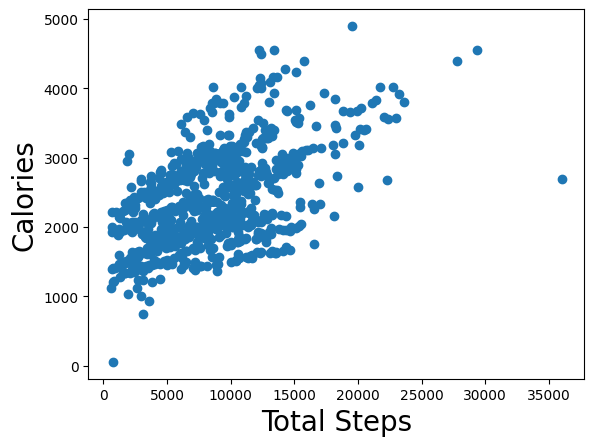

In [14]:
plt.scatter(x1,y)
plt.xlabel('Total Steps', fontsize = 20)
plt.ylabel('Calories', fontsize = 20)
plt.show()

In [15]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     402.9
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           7.79e-75
Time:                        14:08:30   Log-Likelihood:                -7267.1
No. Observations:                 940   AIC:                         1.454e+04
Df Residuals:                     938   BIC:                         1.455e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1675.5889     39.427     42.498      0.000    1598.213    1752.965
TotalSteps     0.0826      0.004     20.072      0.000       0.075       0.091
==============================================================================
Omnibus:                       20.377   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.487
Skew:                           0.334   Prob(JB):                     2.16e-05
Kurtosis:                       3.319   Cond. No.                     2.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
x.shape

(940, 2)

In [21]:
y.shape

(940,)

In [19]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(1880, 1)

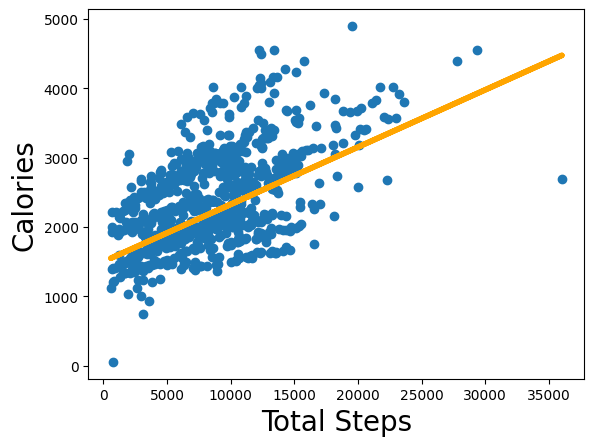

In [49]:
plt.scatter(x1,y)
yhat = 0.0826*x1 + 1500
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Total Steps', fontsize = 20)
plt.ylabel('Calories', fontsize = 20)
plt.show()

## Findings:

# Creating 2nd linear regression Total Daily Distance to Daily Calories Burned

### Set dependent and independent variables:

In [25]:
y = fitbit_mean_df['Calories']
x1 = fitbit_mean_df['TotalDistance']

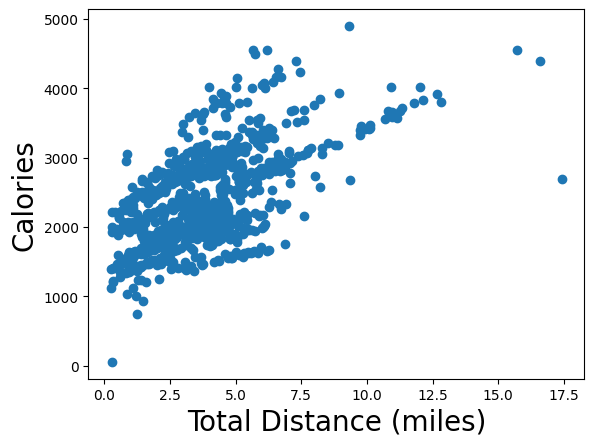

In [31]:
plt.scatter(x1,y)
plt.xlabel('Total Distance (miles)', fontsize = 20)
plt.ylabel('Calories', fontsize = 20)
plt.show()

In [27]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     571.6
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           5.05e-99
Time:                        14:39:55   Log-Likelihood:                -7211.4
No. Observations:                 940   AIC:                         1.443e+04
Df Residuals:                     938   BIC:                         1.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1659.7234     34.563     48.020      0.000    1591.893    1727.554
TotalDistance   189.1328      7.911     23.908      0.000     173.608     204.658
==============================================================================
Omnibus:                       33.868   Durbin-Watson:                   0.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.400
Skew:                           0.374   Prob(JB):                     3.76e-10
Kurtosis:                       3.741   Cond. No.                         9.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

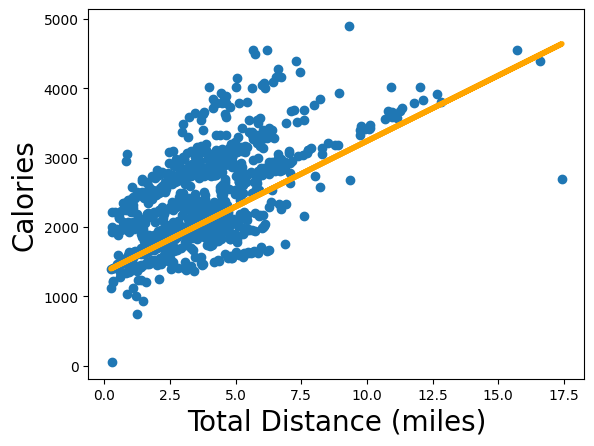

In [30]:
plt.scatter(x1,y)
yhat = 189.1328 * x1 + 1347
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Total Distance (miles)', fontsize = 20)
plt.ylabel('Calories', fontsize = 20)
plt.show()

## Findings:

# Creating 3rd linear regression daily steps to daily calories burned

### Set dependent and independent variables:

In [32]:
y = fitbit_mean_df['Calories']
x1 = fitbit_mean_df['VeryActiveMinutes']

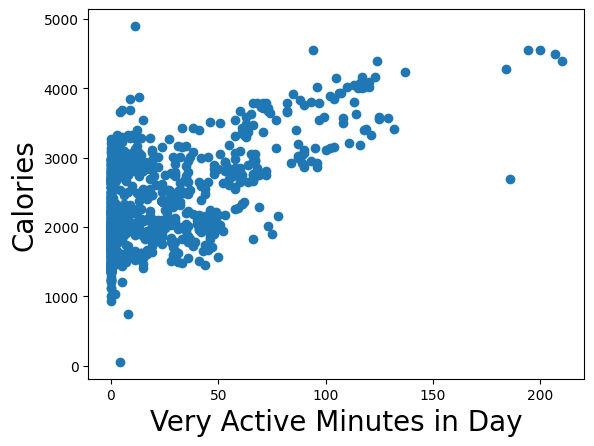

In [36]:
plt.scatter(x1,y)
plt.xlabel('Very Active Minutes in Day', fontsize = 20)
plt.ylabel('Calories', fontsize = 20)
plt.show()

In [37]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     558.0
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           3.53e-97
Time:                        15:04:22   Log-Likelihood:                -7215.6
No. Observations:                 940   AIC:                         1.444e+04
Df Residuals:                     938   BIC:                         1.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2083.4279     21.156     98.478      0.000    2041.909    2124.947
VeryActiveMinutes    12.5631      0.532     23.622      0.000      11.519      13.607
==============================================================================
Omnibus:                       27.058   Durbin-Watson:                   0.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.904
Skew:                           0.335   Prob(JB):                     7.16e-08
Kurtosis:                       3.626   Cond. No.                         49.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

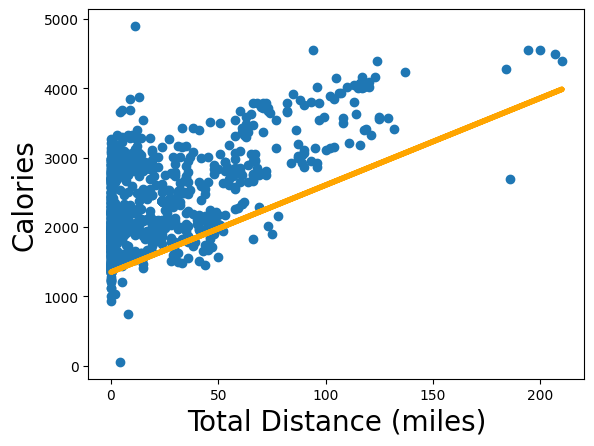

In [38]:
plt.scatter(x1,y)
yhat = 12.5631 * x1 + 1347
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Total Distance (miles)', fontsize = 20)
plt.ylabel('Calories', fontsize = 20)
plt.show()

In [ ]:
# Assuming you have already loaded the data and performed the regression as mentioned before

# Add a constant column for the intercept term in the regression
X = sm.add_constant(x1)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the predicted values from the model
predicted_values = model.predict(X)

# Create a DataFrame with actual and predicted values for visualization
visualization_data = pd.DataFrame({'Actual': y, 'Predicted': predicted_values})

# Plot the scatter plot of actual vs. predicted values
sns.scatterplot(x='Predicted', y='Actual', data=visualization_data)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Creating Multi Variate regression with all three independent variables

In [56]:
y = fitbit_mean_df['Calories']
x1 = fitbit_mean_df[['TotalDistance','VeryActiveMinutes','TotalSteps']]

In [57]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     362.8
Date:                Wed, 02 Aug 2023   Prob (F-statistic):          3.00e-156
Time:                        09:46:32   Log-Likelihood:                -7072.5
No. Observations:                 940   AIC:                         1.415e+04
Df Residuals:                     936   BIC:                         1.417e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1982.8466     35.071     56.537      0.000    1914.019    2051.674
TotalDistance       585.5795     36.361     16.105      0.000     514.221     656.938
VeryActiveMinutes     7.4989      0.619     12.116      0.000       6.284       8.714
TotalSteps           -0.2357      0.018    -13.389      0.000      -0.270      -0.201
==============================================================================
Omnibus:                       35.568   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.619
Skew:                          -0.023   Prob(JB):                     1.05e-21
Kurtosis:                       4.570   Cond. No.                     2.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""